## Perspectief 1


In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
from IPython.display import display, HTML
import json
import uuid

In [2]:
file = r"P_Data_Extract_From_Global_Bilateral_Migration.xlsx"
df = pd.read_excel(file)
df.head()


,Country Origin Name,Country Origin Code,Migration by Gender Name,Migration by Gender Code,Country Dest Name,Country Dest Code,1960 [1960],1970 [1970],1980 [1980],1990 [1990],2000 [2000]
0,Afghanistan,AFG,Female,FEM,Afghanistan,AFG,0,0,0,0,0
1,Afghanistan,AFG,Female,FEM,Albania,ALB,0,0,0,0,0
2,Afghanistan,AFG,Female,FEM,Algeria,DZA,22,8,6,5,4
3,Afghanistan,AFG,Female,FEM,American Samoa,ASM,0,0,0,0,0
4,Afghanistan,AFG,Female,FEM,Andorra,AND,0,0,0,2,3


De tweede dataset die we gebruiken is de dataset over de ontwikkeling van landen over tijd aan de hand van levensstandaarden (world Bank Group, 2025). Het succes van een land is hier in veel verschillende methodes af te lezen. Door het grote aantal variabelen hebben we gekozen voor de meest belangrijke variabelen met de grootste hoeveelheid data. Door te kijken naar de stijgingen of dalingen in de dataset kunnen wij concluderen hoe een land zich over een periode van jaren/decennia ontwikkeld.
(Link naar de database: https://databank.worldbank.org/source/world-development-indicators)

In [3]:
file2 = r"P_Data_Extract_From_World_Development_Indicators.xlsx"
df = pd.read_excel(file2)
df.head()


,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1970 [YR1970],1980 [YR1980],1990 [YR1990],2000 [YR2000]
0,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,..,..,..,..,5.5
1,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,..,..,..,..,0.8
2,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,..,..,..,..,25.3
3,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,4.4
4,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,..,..,..,..,..


De derde dataset die we gebruiken is de dataset met de inwonersaantallen per land. Aan de hand van deze dataset kunnen we de migratiecijfers vergelijken met de inwonersaantallen van het betreffende land. Dit heeft de voordelen dat inwoner aantallen niet een vertekend beeld geven in het onderzoek
(Link naar de database:
https://data.worldbank.org/indicator/SP.POP.TOTL)

De laatste datasets die gebruikt worden als ondersteuning van onze perspectieven zijn de datasets “bbb.xlsx, gdp_per_inwoner.xlsx en longitude-latitude.xlsx”. bbb.xlsx is een dataset die de sterftecijfers per land weergeeft over een tijdsperiode. Deze hebben we los gemaakt uit world development indicators.

gdp_per_inwoner.xlsx komt uit de World Bank Group (2025) en geeft het gemiddelde bruto binnenlands product (BBP/GDP) aan per inwoner over een tijdsperiode.

Longitude-latitude.xlsx is een dataset die uit Google Datasets(2025) komt. De dataset geeft de coördinaten van alle landen in de wereld aan.

We hebben onze datasets niet echt verwerkt voordat we gingen werken aan de visualisaties. We hebben dit bij elke visualisatie apart gedaan in plaats van in één keer aan het begin. Dit komt vooral omdat we allemaal appart de data hadden verwerkt voor onze eigen visualisaties.



### Argument 1: Migratie en Leefomstandigheden, een Historische herhaling


Wereldwijde migratie is vaak geen vrije keuze maar een beslissing genomen uit nood. Oorlog en landelijk conflict spelen daar vaak een rol bij, maar is dit ook werkelijk zo. Ons perspectief wat wij willen onderzoeken en beargumenten heeft te maken met migratie uit nood door slechte levensomstandigheden. Met het perspectief “Migranten emigreren vooral uit hun eigen land omdat de levensomstandigheden in hun eigen land te slecht/gevaarlijk zijn om een normaal leven in te kunnen hebben.” gaan we samen met de twee centrale datasets van dit onderzoek kijken naar een verband tussen migratie en levensstandaarden.

Een historisch voorbeeld wat ons perspectief zou moeten beargumenteren is bijvoorbeeld de Mexicaanse pesos crisis in 1994 wat voor een grote toename tot migratie bracht(Solano & Massey, 2022). Een indicator die de oorzaken van de crisis blootlegt is de explosieve groei van Mexico’s externe schulden. Deze indicator is tegen de migratiecijfers van Mexico aangelegd en is te zien in het resultaat in de figuur hieronder.

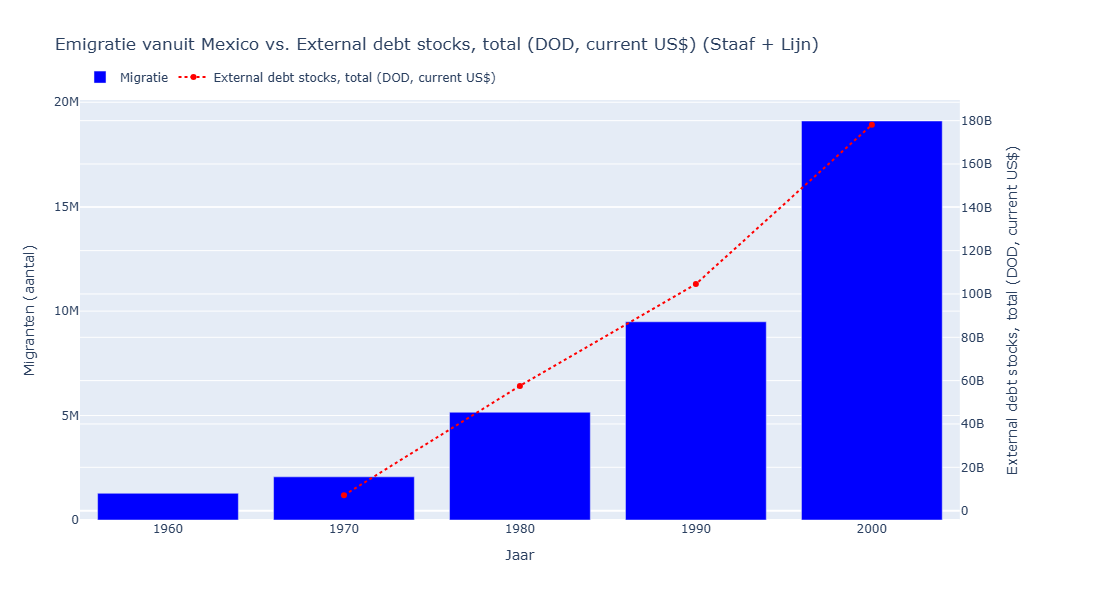

In [4]:


migratie = pd.read_excel("P_Data_Extract_From_Global_Bilateral_Migration.xlsx")
wb_data = pd.read_excel("P_Data_Extract_From_World_Development_Indicators.xlsx")

land = "Mexico"
indicator = "External debt stocks, total (DOD, current US$)"

jaar_kolommen = [col for col in migratie.columns if col.startswith('19') or col.startswith('20')]
jaar_kolommen = sorted(jaar_kolommen, key=lambda x: int(x.split()[0]))
migratie_uit_land = migratie[migratie["Country Origin Name"] == land].copy()
for col in jaar_kolommen:
    migratie_uit_land[col] = pd.to_numeric(migratie_uit_land[col], errors='coerce')

totaal_migratie = migratie_uit_land[jaar_kolommen].sum()
df_migratie = totaal_migratie.reset_index()
df_migratie.columns = ['Jaar', 'Migranten']
df_migratie['Jaar'] = df_migratie['Jaar'].str.extract(r'(\d{4})')[0]
wb_row = wb_data[(wb_data["Country Name"] == land) & 
                 (wb_data["Series Name"] == indicator)].copy()
wb_jaar_kolommen = [col for col in wb_row.columns if col.startswith('19') or col.startswith('20')]
for col in wb_jaar_kolommen:
    wb_row[col] = pd.to_numeric(wb_row[col], errors='coerce')

df_indicator = wb_row[wb_jaar_kolommen].T.reset_index()
df_indicator.columns = ['Jaar', indicator]
df_indicator['Jaar'] = df_indicator['Jaar'].str.extract(r'(\d{4})')[0]
merged = pd.merge(df_migratie, df_indicator, on='Jaar', how='inner')
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(
        x=merged['Jaar'],
        y=merged['Migranten'],
        name="Migratie",
        marker_color='blue',
        hovertemplate="Jaar: %{x}<br>Migranten: %{y:,}"
    ),
    secondary_y=False
)

fig.add_trace(
    go.Scatter(
        x=merged['Jaar'],
        y=merged[indicator],
        name=indicator,
        line=dict(color="red", dash="dot"),
        hovertemplate=f"Jaar: %{{x}}<br>{indicator}: %{{y:,.0f}}"
    ),
    secondary_y=True
)

fig.update_layout(
    title=f"Emigratie vanuit {land} vs. {indicator} (Staaf + Lijn)",
    xaxis_title="Jaar",
    hovermode="x unified",
    legend=dict(orientation="h", yanchor="bottom", y=1.02),
    height=600
)

fig.update_yaxes(title_text="Migranten (aantal)", secondary_y=False)
fig.update_yaxes(title_text=indicator, secondary_y=True)

fig.show()


> Figuur 2: De visualisatie van de vergelijking van migratiecijfers van Mexico (rood) en de schulden door de overheid in Amerikaanse Dollars (blauw). De schulden van de overheid liepen enorm op tijdens de crisis die Mexico onderging in het jaartal 1994. Deze visualisatie geeft de lezer inzicht in dat de migratie cijfers sterk stegen tussen 1990-2000 door een nationale crisis.

Uit de figuur is voor het land Mexico een duidelijke conclusie te trekken over de cijfers van migratie en de slechte levensomstandigheden van dus bijvoorbeeld een financiële crisis. Alhoewel deze argumentatie voor ons perspectief vrij duidelijk is, is het cruciaal om verder te kijken naar alle migratiecijfers van landen op de wereld en hun levensstandaarden. 

